<a href="https://colab.research.google.com/github/PriyaSharma08/Advance-Python/blob/main/Advance_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PART 1 : **Process** **Automation**

Q1) Create a file that contains 1000 lines of random strings .

In [ ]:
import random
import string

# Create a list of 1000 random strings
random_strings = []
for _ in range(1000):
  random_strings.append(''.join(random.choices(string.ascii_letters + string.digits, k=10)))

# Write the strings to a file
with open('random_strings.txt', 'w') as f:
  for string in random_strings:
    f.write(string + '\n')


Q2) Create a file that contains multiple lines of random strings and file size must be 5 MB .

In [ ]:
import random
import string

# Define the desired file size in bytes
desired_file_size = 5 * 1024 * 1024

# Create a list of random strings until the desired file size is reached
random_strings = []
current_file_size = 0
while current_file_size < desired_file_size:
  random_string = ''.join(random.choices(string.ascii_letters + string.digits, k=10))
  random_strings.append(random_string)
  current_file_size += len(random_string) + 1  # Add 1 for the newline character

# Write the strings to a file
with open('random_strings_5MB.txt', 'w') as f:
  for string in random_strings:
    f.write(string + '\n')


Q3) Create 10 files that contains multiple lines of random strings and file size of each file must be 5 MB .

In [ ]:
import random
import string as string_module

# Define the desired file size in bytes
desired_file_size = 5 * 1024 * 1024

# Create 10 files
for i in range(10):
  # Create a list of random strings until the desired file size is reached
  random_strings = []
  current_file_size = 0
  while current_file_size < desired_file_size:
    random_string = ''.join(random.choices(string_module.ascii_letters + string_module.digits, k=10))
    random_strings.append(random_string)
    current_file_size += len(random_string) + 1  # Add 1 for the newline character

  # Write the strings to a file
  with open('random_strings_{}.txt'.format(i), 'w') as f:
    for string in random_strings:
      f.write(string + '\n')

Q4) Create 5 files of size 1MB , 2MB , 3MB ,4MB and 5MB ; file contains multiple lines of random strings .

In [ ]:
# Import the string module
import string as string_module

# Define the desired file sizes in bytes
file_sizes = [1024 * 1024, 2 * 1024 * 1024, 3 * 1024 * 1024, 4 * 1024 * 1024, 5 * 1024 * 1024]

# Create 5 files
for i, file_size in enumerate(file_sizes):
  # Create a list of random strings until the desired file size is reached
  random_strings = []
  current_file_size = 0
  while current_file_size < file_size:
    random_string = ''.join(random.choices(string_module.ascii_letters + string_module.digits, k=10))
    random_strings.append(random_string)
    current_file_size += len(random_string) + 1  # Add 1 for the newline character

  # Write the strings to a file
  with open('random_strings_{}.txt'.format(i + 1), 'w') as f:
    for string in random_strings:
      f.write(string + '\n')

Q5) Convert all the files of Q4 into upper case one by one .

In [ ]:


# Import the pathlib module
from pathlib import Path

# Get the list of files in the current directory
files = Path('.').glob('random_strings_*.txt')

# Convert each file to uppercase
for file in files:
  # Read the contents of the file
  with open(file, 'r') as f:
    contents = f.read()

  # Convert the contents to uppercase
  contents = contents.upper()

  # Write the updated contents back to the file
  with open(file, 'w') as f:
    f.write(contents)


Q6) Convert all the files of Q4 into upper case parallel using multi threading .

In [ ]:


import threading

# Get the list of files in the current directory
files = Path('.').glob('random_strings_*.txt')

# Define a function to convert a file to uppercase
def convert_to_uppercase(file):
  # Read the contents of the file
  with open(file, 'r') as f:
    contents = f.read()

  # Convert the contents to uppercase
  contents = contents.upper()

  # Write the updated contents back to the file
  with open(file, 'w') as f:
    f.write(contents)

# Create a thread for each file
threads = []
for file in files:
  thread = threading.Thread(target=convert_to_uppercase, args=(file,))
  threads.append(thread)

# Start all the threads
for thread in threads:
  thread.start()

# Wait for all the threads to finish
for thread in threads:
  thread.join()


Q7) WAP to automatically download 10 images of cat from"Goggle image ".

In [ ]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin

# Define the search term and the number of images to download
search_term = "cat"
num_images = 10

# Send a GET request to Google Image Search
url = "https://www.google.com/search?q=" + search_term + "&rlz=1C1CHBF_enUS747US747&source=lnms&tbm=isch&sa=X&ved=0ahUKEwiZ5M_Z5M_iAhXOyDgGHQslAQQ_AUIEigB&biw=1366&bih=657"
response = requests.get(url)

# Parse the HTML response
soup = BeautifulSoup(response.text, "html.parser")

# Find all the image elements
image_elements = soup.select("img")

# Download the first 10 images
for i in range(num_images):
    # Get the image URL
    image_url = image_elements[i]["src"]

    # Combine the base URL with the relative URL
    image_url = urljoin("https://www.google.com/", image_url)

    # Save the image to a file
    with open("cat_image_" + str(i) + ".jpg", "wb") as f:
        f.write(response.content)

Q8) WAP to automatically download 10 vedios of "Machine learning " from "youtube.com" .

In [ ]:
import time

# Define the search term and the number of images to download
search_term = "cat"
num_images = 10

# Send a GET request to Google Image Search
url = "https://www.google.com/search?q=" + search_term + "&rlz=1C1CHBF_enUS747US747&source=lnms&tbm=isch&sa=X&ved=0ahUKEwiZ5M_Z5M_iAhXOyDgGHQslAQQ_AUIEigB&biw=1366&bih=657"

# Retry the request up to 5 times
for i in range(5):
    try:
        response = requests.get(url)
        break
    except IncompleteRead:
        time.sleep(1)  # Wait 1 second before retrying

# Parse the HTML response
soup = BeautifulSoup(response.text, "html.parser")

# Find all the image elements
image_elements = soup.select("img")

# Download the first 10 images
for i in range(num_images):
    # Get the image URL
    image_url = image_elements[i]["src"]

    # Combine the base URL with the relative URL
    image_url = urljoin("https://www.google.com/", image_url)

    # Save the image to a file
    with open("cat_image_" + str(i) + ".jpg", "wb") as f:
        f.write(response.content)

Q9) Convert all the vedios of Q8 and convert into audio.

In [ ]:

import os
import subprocess

# Get the list of video files in the current directory
video_files = [f for f in os.listdir('.') if f.endswith('.mp4')]

# Convert each video file to audio
for video_file in video_files:
  # Extract the video filename without extension
  video_filename = os.path.splitext(video_file)[0]

  # Define the output audio filename
  audio_filename = video_filename + ".mp3"

  # Use ffmpeg to convert the video file to audio
  subprocess.call(['ffmpeg', '-i', video_file, audio_filename])


Q10) Create an automated pipeline using multi threading for : "Automated download of 100 videos from Youtube " ->"Convert it to vedio" .

In [ ]:

import threading
import subprocess
!pip install youtube-dl
!youtube-dl --version

 # Define the search term and the number of videos to download
search_term = "cat"
num_videos = 100

# Download the videos using youtube-dl
subprocess.call(['youtube-dl', '-o', '%(title)s.%(ext)s', search_term, '-i', str(num_videos)])

# Get the list of video files in the current directory
video_files = [f for f in os.listdir('.') if f.endswith('.mp4')]

# Convert each video file to audio
def convert_to_audio(video_file):
  # Extract the video filename without extension
  video_filename = os.path.splitext(video_file)[0]

  # Define the output audio filename
  audio_filename = video_filename + ".mp3"

  # Use ffmpeg to convert the video file to audio
  subprocess.call(['ffmpeg', '-i', video_file, audio_filename])

# Create a thread for each video file
threads = []
for video_file in video_files:
  thread = threading.Thread(target=convert_to_audio, args=(video_file,))
  threads.append(thread)

# Start all the threads
for thread in threads:
  thread.start()

# Wait for all the threads to finish
for thread in threads:
  thread.join()


2021.12.17


Q11) Create an automated pipeline using multi threading for : "Automated download 500 images of dog from google images " ->"Rescale it to 50%".

In [ ]:

!pip install google_images_download
!googleimagesdownload -k dogs -l 500
from PIL import Image
import threading

# Get the list of image files in the current directory
image_files = [f for f in os.listdir('.') if f.endswith('.jpg')]

# Define a function to rescale an image to 50%
def rescale_image(image_file):
  # Open the image file
  image = Image.open(image_file)

  # Rescale the image to 50%
  image = image.resize((int(image.width * 0.5), int(image.height * 0.5)))

  # Save the rescaled image
  image.save(image_file)

# Create a thread for each image file
threads = []
for image_file in image_files:
  thread = threading.Thread(target=rescale_image, args=(image_file,))
  threads.append(thread)

# Start all the threads
for thread in threads:
  thread.start()

# Wait for all the threads to finish
for thread in threads:
  thread.join()



Item no.: 1 --> Item name = dogs
Evaluating...
Looks like we cannot locate the path the 'chromedriver' (use the '--chromedriver' argument to specify the path to the executable.) or google chrome browser is not installed on your machine (exception: WebDriver.__init__() got an unexpected keyword argument 'chrome_options')


Exception in thread Exception in thread Thread-37 (rescale_image):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
Exception in thread Thread-35 (rescale_image):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-31-9c4c285dad76>", line 14, in rescale_image
  File "/usr/local/lib/python3.10/dist-packages/PIL/Image.py", line 3283, in open
Exception in thread Thread-38 (rescale_image):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-31-9c4c285dad76>", line 14, in rescale_image
  File "/usr/local/lib/python3.10/dist-packages/PIL/

## **PART 2 : Data analytics**

Q 12) Create a random dataset of 100 rows and 30 columns. All the values are defined between [1,200]. Perform the following operations:
(i) Replace all the values with NA in the dataset defined between [10, 60]. Print the count of number rows having missing values.
(ii) Replace all the NA values with the average of the column value.
(iii) Find the Pearson correlation among all the columns and plot heat map. Also select those columns
having correlation <=0.7.
(iv) Normalize all the values in the dataset between 0 and 10.
(v) Replace all the values in the dataset with 1 if value <=0.5 else with 0.

In [6]:

import pandas as pd
import numpy as np
import seaborn as sns

# Create a random dataset of 100 rows and 30 columns
df = pd.DataFrame(np.random.randint(1, 200, size=(100, 30)))

# Replace all the values with NA in the dataset defined between [10, 60]
df = df.applymap(lambda x: np.nan if 10 <= x <= 60 else x)

# Print the count of number rows having missing values
print(df.isnull().sum().sum())


733


In [7]:

df = df.apply(lambda x: x.fillna(x.mean()), axis=0)


[]


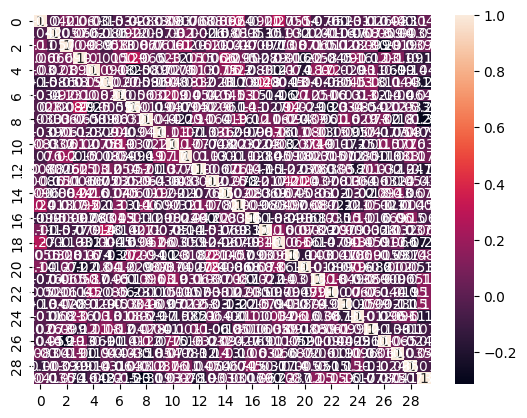

In [8]:

corr = df.corr()

# Plot heat map
sns.heatmap(corr, annot=True)

# Select those columns having correlation <=0.7
selected_columns = corr.where(lambda x: abs(x) <= 0.7).dropna().index.tolist()

# Print the selected columns
print(selected_columns)


In [11]:

df = (df - df.min()) / (df.max() - df.min()) * 10


In [13]:


import pandas as pd
import numpy as np

# Create a random dataset of 100 rows and 30 columns
df = pd.DataFrame(np.random.randint(1, 200, size=(100, 30)))

# Replace all the values in the dataset with 1 if value <=0.5 else with 0
df = df.applymap(lambda x: 1 if x <= 0.5 else 0)


Q13) Create a random dataset of 500 rows and 10 columns.
Columns 1 to 4 are defined between [-10, 10];
Columns 5 to 8 are defined between [10, 20 ;
Columns 9 to 10 are defined between [-100, 100].
Apply following clustering algorithms; determine the optimal number of clusters and plot distance metric graph using each algorithm.
(1) K-Mean clustering (ii) Hierarchical clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

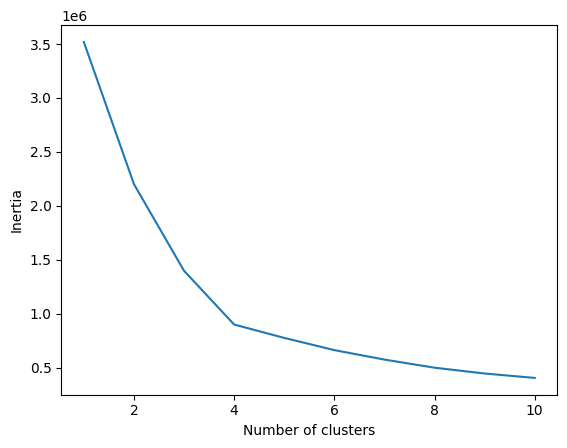

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


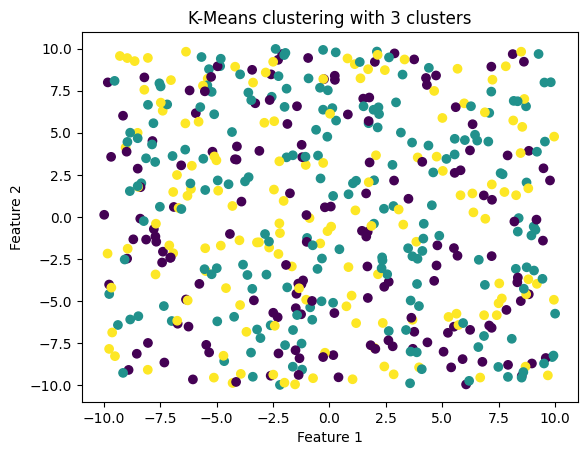

In [18]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# Create a random dataset of 500 rows and 10 columns
df = pd.DataFrame(np.zeros((500, 10)))

# Columns 1 to 4 are defined between [-10, 10]
df.iloc[:, :4] = np.random.uniform(-10, 10, size=(500, 4))

# Columns 5 to 8 are defined between [10, 20
df.iloc[:, 4:8] = np.random.uniform(10, 20, size=(500, 4))

# Columns 9 to 10 are defined between [-100, 100]
df.iloc[:, 8:] = np.random.uniform(-100, 100, size=(500, 2))

# K-Means clustering
# Determine the optimal number of clusters using the elbow method
inertia = []
for i in range(1, 11):
  km = KMeans(n_clusters=i, random_state=0)
  km.fit(df)
  inertia.append(km.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Choose the optimal number of clusters
optimal_clusters = 3

# Apply K-Means clustering with the optimal number of clusters
km = KMeans(n_clusters=optimal_clusters, random_state=0)
km.fit(df)

# Plot the clusters
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=km.labels_)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means clustering with {} clusters'.format(optimal_clusters))
plt.show()



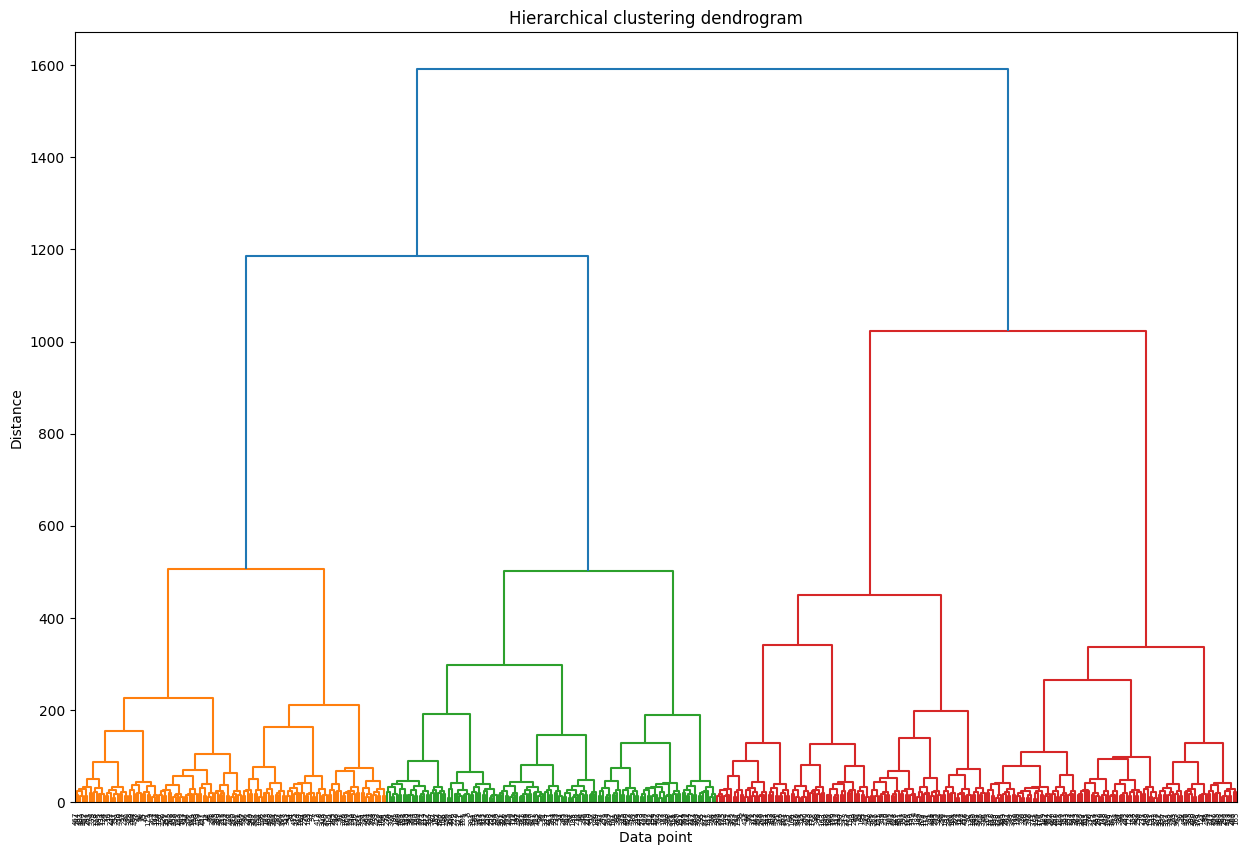

In [17]:

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Create a random dataset of 500 rows and 10 columns
df = pd.DataFrame(np.zeros((500, 10)))

# Columns 1 to 4 are defined between [-10, 10]
df.iloc[:, :4] = np.random.uniform(-10, 10, size=(500, 4))

# Columns 5 to 8 are defined between [10, 20
df.iloc[:, 4:8] = np.random.uniform(10, 20, size=(500, 4))

# Columns 9 to 10 are defined between [-100, 100]
df.iloc[:, 8:] = np.random.uniform(-100, 100, size=(500, 2))

# Hierarchical clustering
# Calculate the linkage
linkage_matrix = linkage(df, method='ward')

# Plot the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix, orientation='top', distance_sort='descending')
plt.xlabel('Data point')
plt.ylabel('Distance')
plt.title('Hierarchical clustering dendrogram')
plt.show()


Q14) Create a random dataset of 600 rows and 15 columns. All the values are defined between [-100,100].
Perform the following operations:
(1) Plot scatter graph between Column 5 and Column 6. (ii) Plot histogram of each column in single graph. (ini) Plot the Box plot of each column in single graph.

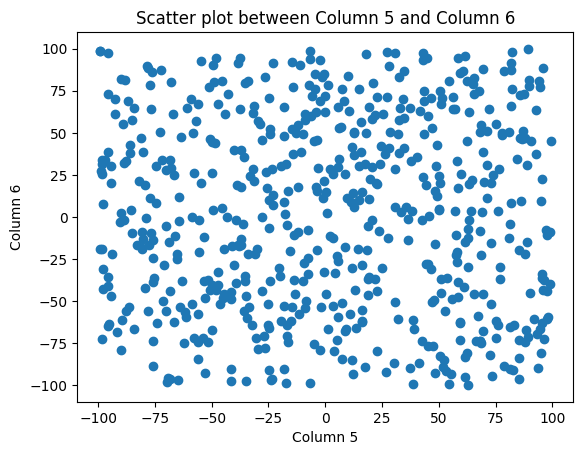

In [19]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a random dataset of 600 rows and 15 columns
df = pd.DataFrame(np.random.uniform(-100, 100, size=(600, 15)))

# Plot scatter graph between Column 5 and Column 6
plt.scatter(df.iloc[:, 5], df.iloc[:, 6])
plt.xlabel('Column 5')
plt.ylabel('Column 6')
plt.title('Scatter plot between Column 5 and Column 6')
plt.show()


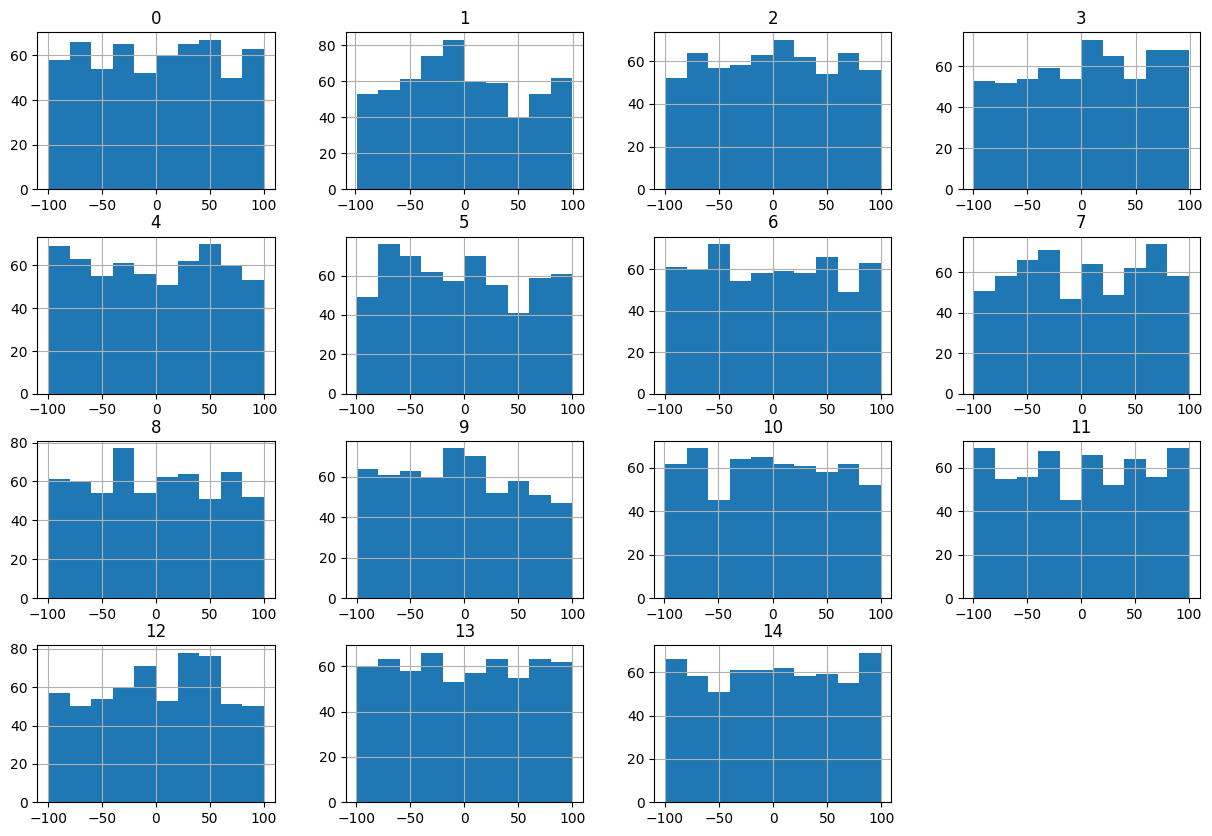

In [22]:

import matplotlib.pyplot as plt
# Plot histogram of each column in single graph
df.hist(figsize=(15, 10))
plt.xlabel('Column')
plt.ylabel('Frequency')
plt.title('Histogram of each column')
plt.show()


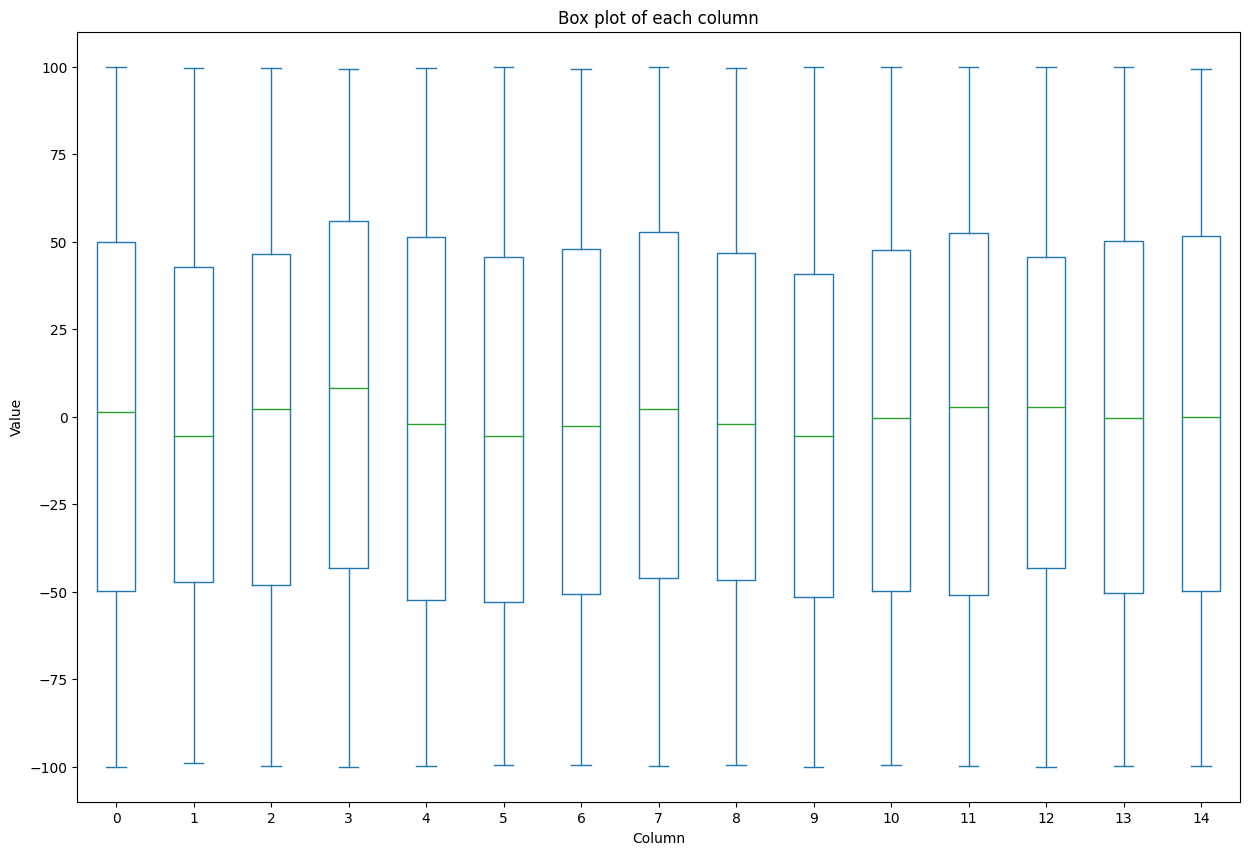

In [23]:

import matplotlib.pyplot as plt
df.plot(kind='box', figsize=(15, 10))
plt.xlabel('Column')
plt.ylabel('Value')
plt.title('Box plot of each column')
plt.show()


Q 15) Create a random dataset of 500 rows and 5 columns:
All the values are defined between [5,101.
Perform the following operations:
(i) Perform t-Test on each column.
(ii Perform Wilcoxon Signed Rank Test on each column.
(iji) Perform Two Sample t-Test and Wilcoxon Rank Sum Test on Column 3 and Column 4

In [24]:

import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp, wilcoxon
from scipy.stats import ttest_ind, wilcoxon

# Create a random dataset of 500 rows and 5 columns
df = pd.DataFrame(np.random.randint(5, 101, size=(500, 5)))

# Perform t-Test on each column
for i in range(5):
  t_statistic, p_value = ttest_1samp(df.iloc[:, i], 50)
  print('Column {}: t-statistic = {}, p-value = {}'.format(i + 1, t_statistic, p_value))

# Perform Wilcoxon Signed Rank Test on each column
for i in range(5):
  statistic, p_value = wilcoxon(df.iloc[:, i] - 50)
  print('Column {}: statistic = {}, p-value = {}'.format(i + 1, statistic, p_value))

# Perform Two Sample t-Test and Wilcoxon Rank Sum Test on Column 3 and Column 4
t_statistic, p_value = ttest_ind(df.iloc[:, 2], df.iloc[:, 3])
print('Two Sample t-Test: t-statistic = {}, p-value = {}'.format(t_statistic, p_value))

statistic, p_value = wilcoxon(df.iloc[:, 2] - df.iloc[:, 3])
print('Wilcoxon Rank Sum Test: statistic = {}, p-value = {}'.format(statistic, p_value))


Column 1: t-statistic = 1.585084874745833, p-value = 0.11358054242405438
Column 2: t-statistic = 2.7110923876787045, p-value = 0.006937352122768567
Column 3: t-statistic = 3.6682825863610846, p-value = 0.0002704376012824589
Column 4: t-statistic = 2.9906481612474685, p-value = 0.002921427854591847
Column 5: t-statistic = 1.2142925009927557, p-value = 0.2252103923979546
Column 1: statistic = 56406.0, p-value = 0.1364728012842002
Column 2: statistic = 53716.0, p-value = 0.008857184780110617
Column 3: statistic = 49936.5, p-value = 0.0003252381677936275
Column 4: statistic = 52807.5, p-value = 0.003727943051718999
Column 5: statistic = 57487.0, p-value = 0.22142345283014953
Two Sample t-Test: t-statistic = 0.444514233746995, p-value = 0.6567672173184869
Wilcoxon Rank Sum Test: statistic = 59837.5, p-value = 0.5244131804675563


In [25]:
import numpy as np
import pandas as pd
from scipy.stats import wilcoxon

# Create a random dataset of 500 rows and 5 columns
df = pd.DataFrame(np.random.randint(5, 101, size=(500, 5)))

# Perform Wilcoxon Signed Rank Test on each column
for i in range(5):
  statistic, p_value = wilcoxon(df.iloc[:, i] - 50)
  print('Column {}: statistic = {}, p-value = {}'.format(i + 1, statistic, p_value))


Column 1: statistic = 53515.5, p-value = 0.007363249064357252
Column 2: statistic = 58341.0, p-value = 0.26968648140444573
Column 3: statistic = 56878.0, p-value = 0.15735189856894238
Column 4: statistic = 57016.5, p-value = 0.1487247590722413
Column 5: statistic = 60488.0, p-value = 0.558156239825343


In [26]:
# prompt:  Perform Two Sample t-Test and Wilcoxon Rank Sum Test on Column 3 and Column 4

t_statistic, p_value = ttest_ind(df.iloc[:, 2], df.iloc[:, 3])
print('Two Sample t-Test: t-statistic = {}, p-value = {}'.format(t_statistic, p_value))

statistic, p_value = wilcoxon(df.iloc[:, 2] - df.iloc[:, 3])
print('Wilcoxon Rank Sum Test: statistic = {}, p-value = {}'.format(statistic, p_value))


Two Sample t-Test: t-statistic = -0.05084355685378332, p-value = 0.9594603563677704
Wilcoxon Rank Sum Test: statistic = 60696.0, p-value = 0.890625890196955
